# Solving A Simple Classification Problem with Python

In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# fruits = pd.read_table('fruit_data_with_colors.txt')
# fruits.head()

In [2]:
nba_season_data = pd.read_csv('data/used/nba_season_data.csv', low_memory=False)
basketball_players = pd.read_csv('data/used/basketball_players.csv').rename(columns={'playerID':'player_id'})
all_players = pd.merge(basketball_players, nba_season_data, on='player_id')

# There are 814 players in the dataset

In [9]:
len(all_players['player_id'].unique())

814

In [5]:
all_players.head()

,player_id,year_x,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,d_worp,adjusted_worp,estimated_position,bbref_pos,age_on_feb_1,yrs_experience,height,weight,rounded_position,rounded_age
0,abdulma02,2000,1,VAN,NBA,41,0,486,266,5,...,-4.2,0.0,1.0,1.0,21.9,0.0,73.0,162.0,1.0,22.0
1,abdulma02,2000,1,VAN,NBA,41,0,486,266,5,...,-3.4,0.0,1.0,1.0,22.9,1.0,73.0,162.0,1.0,23.0
2,abdulma02,2000,1,VAN,NBA,41,0,486,266,5,...,-3.2,1.3,1.0,1.0,23.9,2.0,73.0,162.0,1.0,24.0
3,abdulma02,2000,1,VAN,NBA,41,0,486,266,5,...,-3.3,2.1,1.0,1.0,24.9,3.0,73.0,162.0,1.0,25.0
4,abdulma02,2000,1,VAN,NBA,41,0,486,266,5,...,-3.5,1.8,1.0,1.0,25.9,4.0,73.0,162.0,1.0,26.0


# There are  33861 pieces of information for each player and 150 features in the dataset:

In [6]:
print(all_players.shape)

(33861, 150)


In [ ]:
Unique players in the dataset

In [31]:
grouped_players = all_players.groupby(['year_x', 'player_id'])
grouped_players = grouped_players.agg([np.mean]).reset_index()
grouped_players.columns = grouped_players.columns.droplevel(1)
grouped_players[grouped_players.player_id=='abdursh01']

,year_x,player_id,stint,GP,GS,minutes,points,oRebounds,dRebounds,rebounds,...,d_worp,adjusted_worp,estimated_position,bbref_pos,age_on_feb_1,yrs_experience,height,weight,rounded_position,rounded_age
2,2000,abdursh01,1.0,81.0,0,3241.0,1663.0,175.0,560.0,735.0,...,0.169231,4.515385,3.538462,3.769231,25.755385,5.615385,81.0,225.0,3.615385,25.615385
442,2001,abdursh01,1.0,77.0,0,2980.0,1636.0,198.0,498.0,696.0,...,0.169231,4.515385,3.538462,3.769231,25.755385,5.615385,81.0,225.0,3.615385,25.615385
882,2002,abdursh01,1.0,81.0,0,3083.0,1608.0,175.0,502.0,677.0,...,0.169231,4.515385,3.538462,3.769231,25.755385,5.615385,81.0,225.0,3.615385,25.615385
1308,2003,abdursh01,1.5,42.5,0,1342.0,692.0,94.5,225.0,319.5,...,0.169231,4.515385,3.538462,3.769231,25.755385,5.615385,81.0,225.0,3.615385,25.615385
1749,2004,abdursh01,1.0,54.0,0,1867.0,909.0,123.0,269.0,392.0,...,0.169231,4.515385,3.538462,3.769231,25.755385,5.615385,81.0,225.0,3.615385,25.615385
2212,2005,abdursh01,1.0,72.0,0,1961.0,887.0,106.0,251.0,357.0,...,0.169231,4.515385,3.538462,3.769231,25.755385,5.615385,81.0,225.0,3.615385,25.615385


# Let's see if we have enough players that played for many years.

In [47]:
year_count = pd.DataFrame(grouped_players.groupby('player_id').size()).reset_index()
year_count = year_count.rename(index=str, columns={0: "Count"})
year_count_grouped = year_count.groupby(["Count"])

# As you can see, the data is not really balanced, but we will try to work with it.
### The biggest group are the players that played only 1 year.
### The second biggest group luckily are the players that played 6 years.

In [53]:
for i in range(10):
    print(i, len(year_count[year_count.Count == i]))

0 0
1 213
2 146
3 107
4 77
5 92
6 179
7 0
8 0
9 0


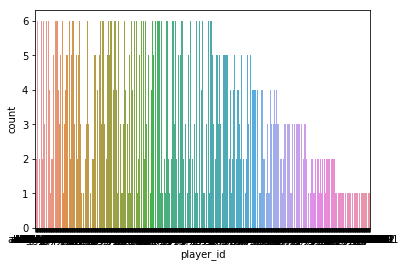

In [56]:
import seaborn as sns
sns.countplot(grouped_players['player_id'], label="Years played")
plt.show()

# Visualization
#### Box plot for each numeric variable will give us a clearer idea of the distribution of the input variables:

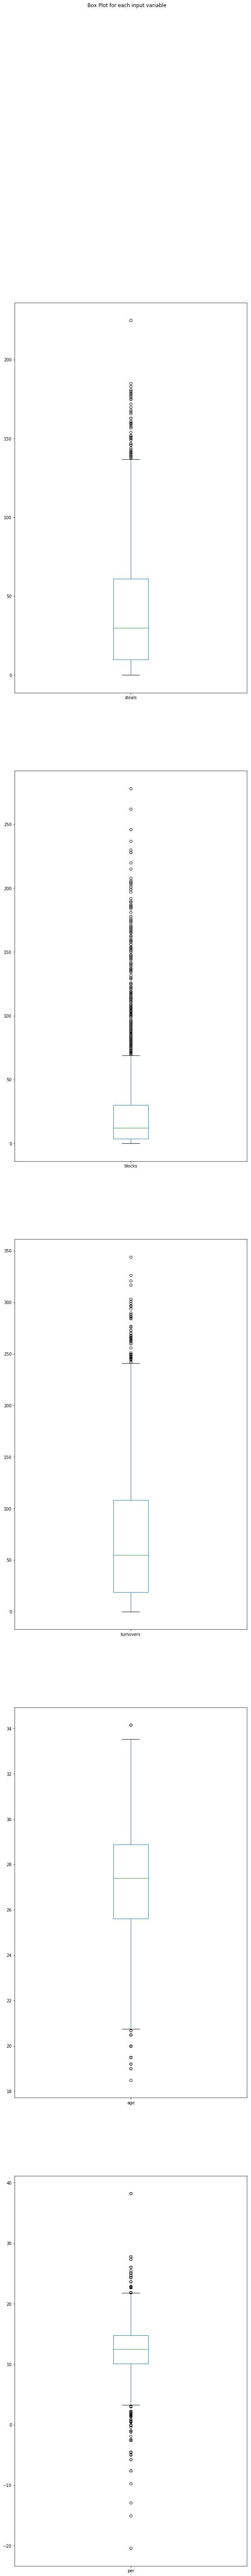

In [111]:
droplist = ['year_x',
 'player_id',
 'GS',
 'PostGP',
 'PostGS',
 'PostMinutes',
 'PostPoints',
 'PostoRebounds',
 'PostdRebounds',
 'PostRebounds',
 'PostAssists',
 'PostSteals',
 'PostBlocks',
 'PostTurnovers',
 'PostPF',
 'PostfgAttempted',
 'PostfgMade',
 'PostftAttempted',
 'PostftMade',
 'PostthreeAttempted',
 'PostthreeMade',
 'note',
#  'year_y',
 'age_on_feb_1',
 'dcontrib_2',
 'dvorp_2',
 'ocontrib_2',
 'ovorp_2',
 'bpm_3',
 'contrib_3',
 'vorp_3',
 'min_2',
 'mpg_2',
 'dbpm_2',
 'contrib_2',
 'tm_sum_2',
 'tm_adj_2',
 'obpm_2',
 'vorp_2',
 'reb_vers_2',
 'val_shot_2',
 'offense_2',
 'defense_2',
 'bpm_2',
 'rounded_age',
           
           
           'stint',
 'GP',
 'minutes',
 'points',
 'oRebounds',
 'dRebounds',
 'rebounds',
 'assists',
#  'steals',
#  'blocks',
#  'turnovers',
 'PF',
 'fgAttempted',
 'fgMade',
 'ftAttempted',
 'ftMade',
 'threeAttempted',
 'threeMade',
 'year_y',
#  'age',
 'g',
 'mp',
#  'per',
 'ts',
 '3par',
 'ftr',
 'orb',
 'drb',
 'trb',
 'ast',
 'stl',
 'blk',
 'tov',
 'usg',
 'ows',
 'dws',
 'ws',
 'ws_48',
 'obpm',
 'dbpm',
 'bpm',
 'vorp',
 'ows_48',
 'dws_48',
 'shot',
 'team_mar',
 'team_mp',
 'team_gm',
 'year_3par',
 'team_ts',
 'tm_usg',
 'tm_ts_w_o_plyr',
 'reb_vers',
 'defense',
 'val_shot',
 'offense',
 'mpg_int',
 'raw_spm',
 'min',
 'raw_contrib',
 'tm_sum',
 'tm_adj',
 'stderr',
 'contrib',
 'mpg',
 'raw_obpm',
 'tm_ortg',
 'tm_drtg',
 'ostderr',
 'ocontrib',
 'ovorp',
 'dstderr',
 'dcontrib',
 'dvorp',
 'sum_spm',
 'rempg',
 'vorp_gm',
 'o_bpm',
 'ovorp_gm',
 'd_bpm',
 'dvorp_gm',
 'exp_bpm',
 'truetalentbpm',
 'exp_min',
 'truetalentvorp',
 'truetimevorp',
 'worp',
 'o_worp',
 'd_worp',
 'adjusted_worp',
 'estimated_position',
 'bbref_pos',
 'yrs_experience',
 'height',
 'weight',
 'rounded_position']
grouped_players.drop(droplist, axis=1).plot(kind='box', subplots=True, layout=(5,1), sharex=False, sharey=False, figsize=(10,100), 
                                        title='Box Plot for each input variable')
plt.savefig('player_overview_boxplot')
plt.show() # Value error is for number of plot to show

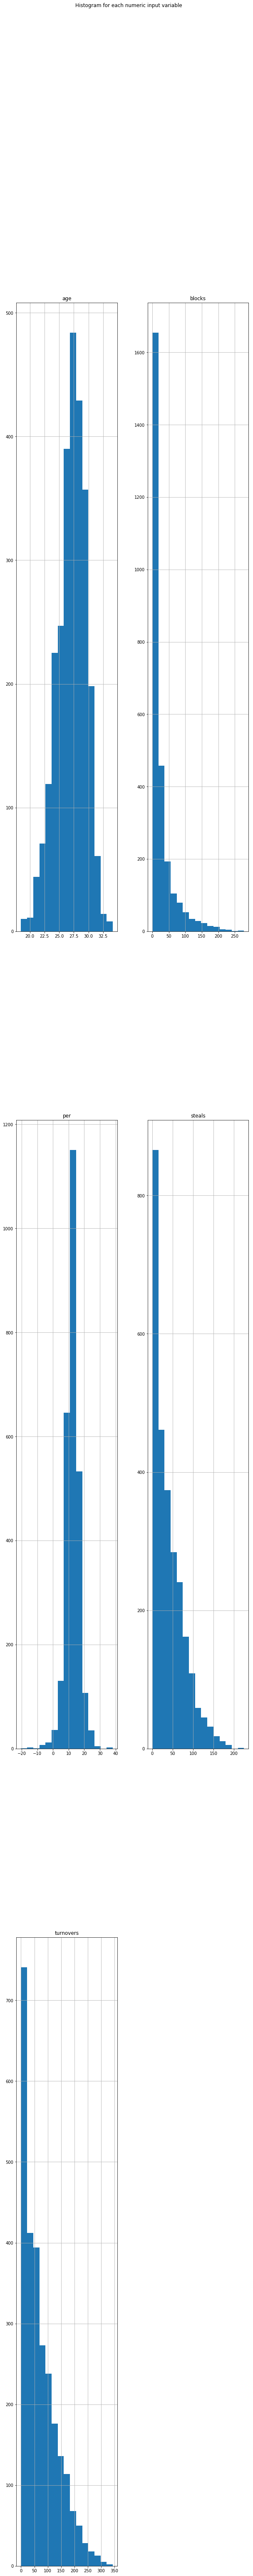

In [114]:
import pylab as pl
grouped_players.drop(droplist, axis=1).hist(bins=15, figsize=(10,100))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('player_overview_hist')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  import sys


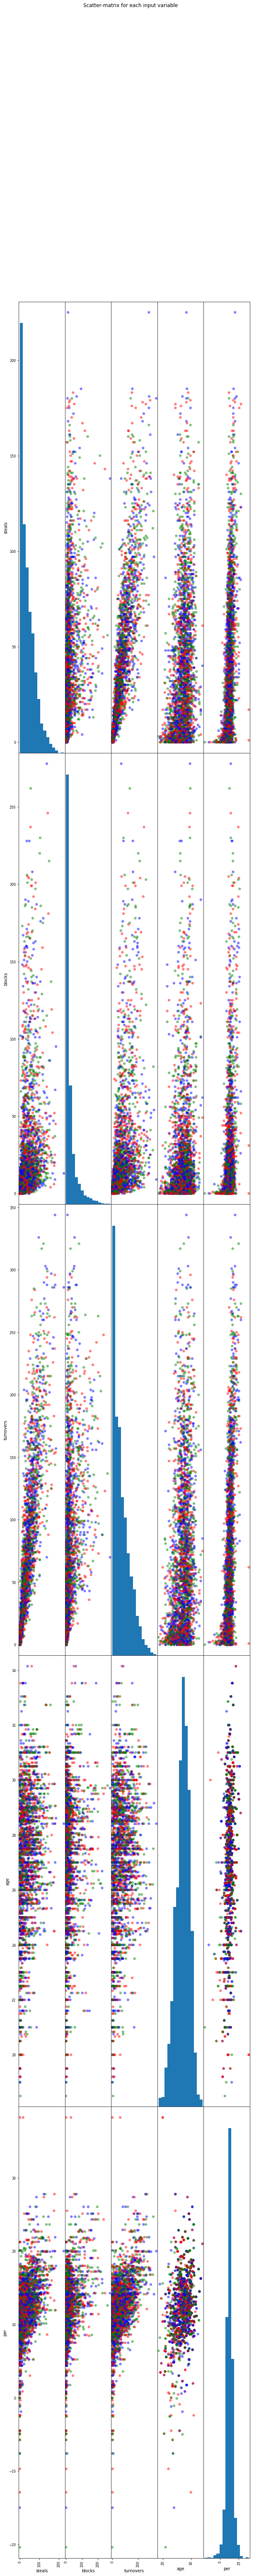

In [113]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = grouped_players.drop(droplist, axis=1).columns.tolist()
X = grouped_players.drop(droplist, axis=1)[feature_names]
y = grouped_players['player_id']
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = 'RGB', marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(10,100), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('player_overview_matrix')

# We can see that the numerical values do not have the same scale. We will need to apply scaling to the test set that we computed for the training set.

#### Create Training and Test Sets and Apply Scaling

In [116]:
X = grouped_players.drop('player_id', axis=1).fillna(0)
y = grouped_players['player_id']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Models
## Logistic Regression


In [117]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.61
Accuracy of Logistic regression classifier on test set: 0.26


## Decision Tree

In [118]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.81


## K-Nearest Neighbors

In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.71
Accuracy of K-NN classifier on test set: 0.40


## Linear Discriminant Analysis

In [121]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 1.00
Accuracy of LDA classifier on test set: 0.86


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## Gaussian Naive Bayes

In [123]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 1.00
Accuracy of GNB classifier on test set: 0.80


## Support Vector Machine

In [124]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.08
Accuracy of SVM classifier on test set: 0.00


## The LDA algorithm was the most accurate model that we tried. 

In [125]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 0]]
             precision    recall  f1-score   support

  abdulta01       0.50      1.00      0.67         1
  abdursh01       0.50      1.00      0.67         1
  alexaco01       0.00      0.00      0.00         0
  alexaco02       0.00      0.00      0.00         3
  allenma01       0.00      0.00      0.00         0
  allenra02       0.50      1.00      0.67         1
  allento01       0.00      0.00      0.00         0
  alstora01       0.25      1.00      0.40         1
  anderch01       0.00      0.00      0.00         0
  anderde01       0.07      1.00      0.13         1
  anderke01       0.25      1.00      0.40         1
  anderni01       0.00      0.00      0.00         2
  andersh01       1.00      1.00      1.00         2
  anthogr01       0.00      0.00      0.00         1
  araujra01       0.00      0.00      0.00         0
  archiro01       0.00      0.0

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
